In [1]:
import seaborn as sns
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay

In [2]:
df = pd.read_csv("/content/selected_features.csv")  # Replace with your actual file

In [3]:
X = df.drop(["target","degree"], axis=1)      # Replace 'target' with actual column name
y = df["target"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False)
}


Logistic Regression
Accuracy:  0.7717
Precision: 0.8224
Recall:    0.7928
F1 Score:  0.8073
AUC Score: 0.8288

Decision Tree
Accuracy:  0.7500
Precision: 0.8421
Recall:    0.7207
F1 Score:  0.7767
AUC Score: 0.7689

Random Forest
Accuracy:  0.7717
Precision: 0.8350
Recall:    0.7748
F1 Score:  0.8037
AUC Score: 0.8343

SVM
Accuracy:  0.8152
Precision: 0.8407
Recall:    0.8559
F1 Score:  0.8482
AUC Score: 0.8581

Gradient Boosting
Accuracy:  0.7826
Precision: 0.8257
Recall:    0.8108
F1 Score:  0.8182
AUC Score: 0.8363

XGBoost
Accuracy:  0.7880
Precision: 0.8333
Recall:    0.8108
F1 Score:  0.8219
AUC Score: 0.8356


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [20:11:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


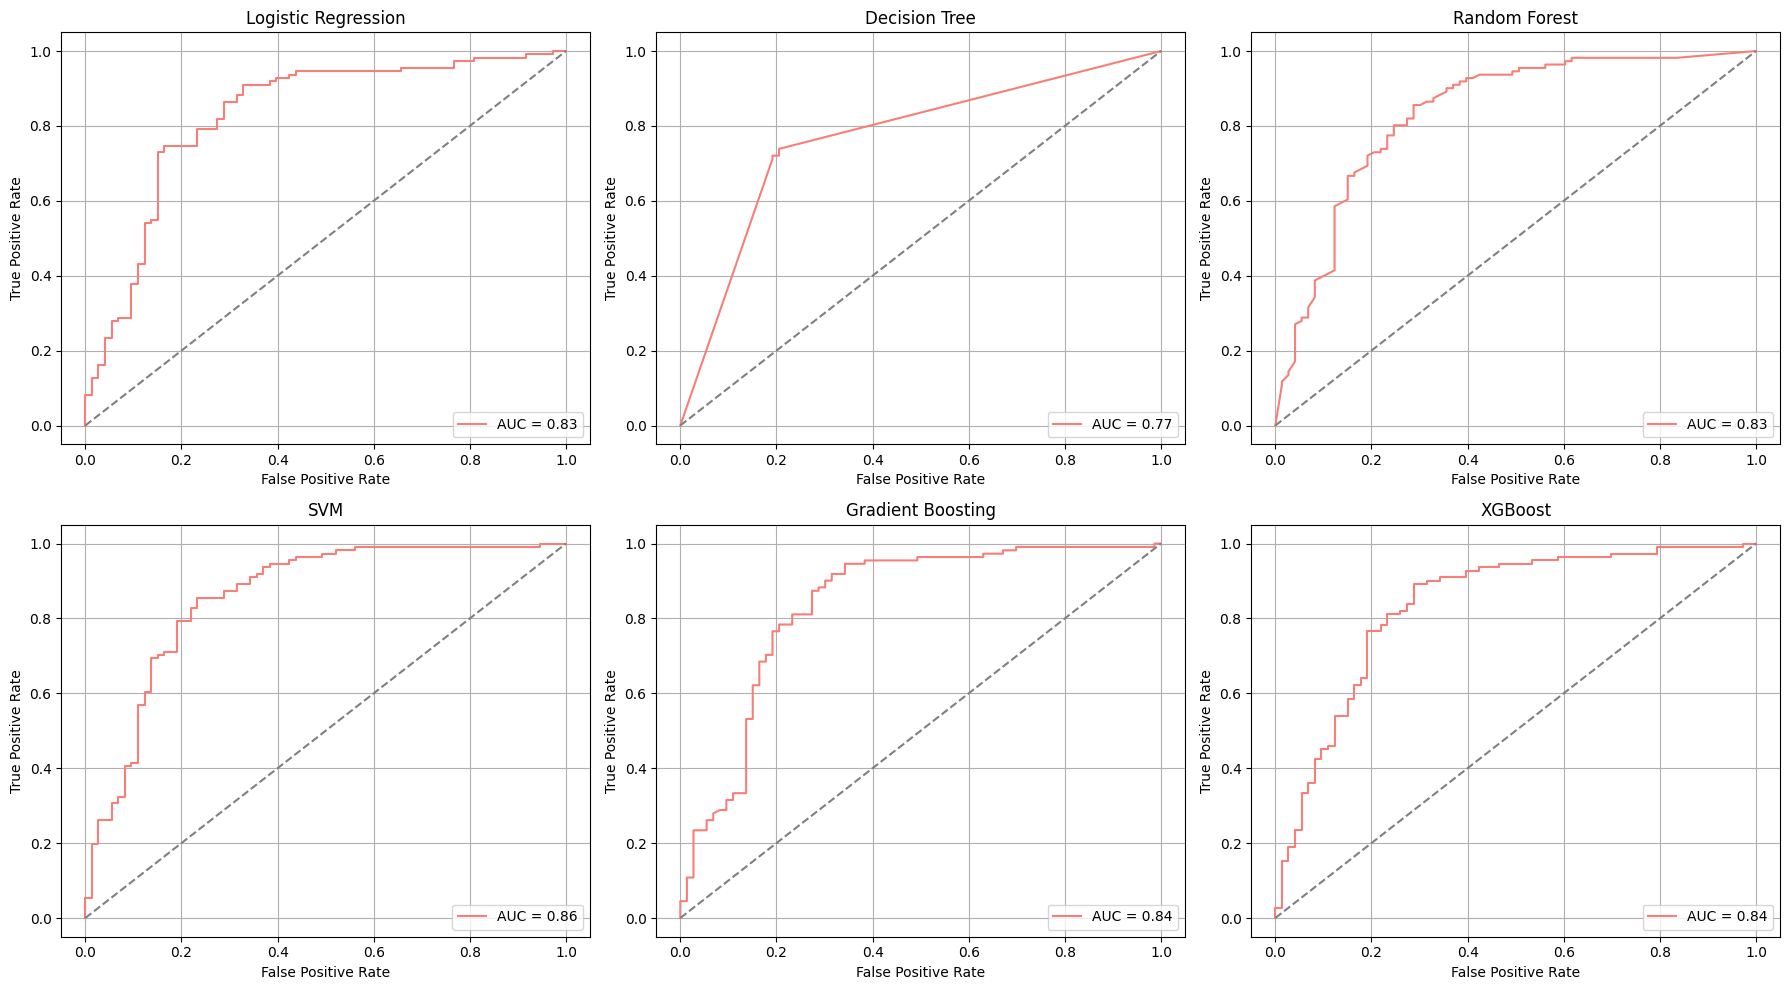

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()
results = {}

for i, (name, model) in enumerate(models.items()):
    print(f"\n{name}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        "confusion_matrix": cm,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1_score": f1,
        "auc_score": roc_auc
    }


    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f"AUC Score: {roc_auc:.4f}")

    ax = axes[i]
    ax.plot(fpr, tpr, color='#f67f79', label=f'AUC = {roc_auc:.2f}')
    ax.plot([0, 1], [0, 1], linestyle='--', color='gray')
    ax.set_title(name)
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc='lower right')
    ax.grid(True)


plt.tight_layout()
plt.show()

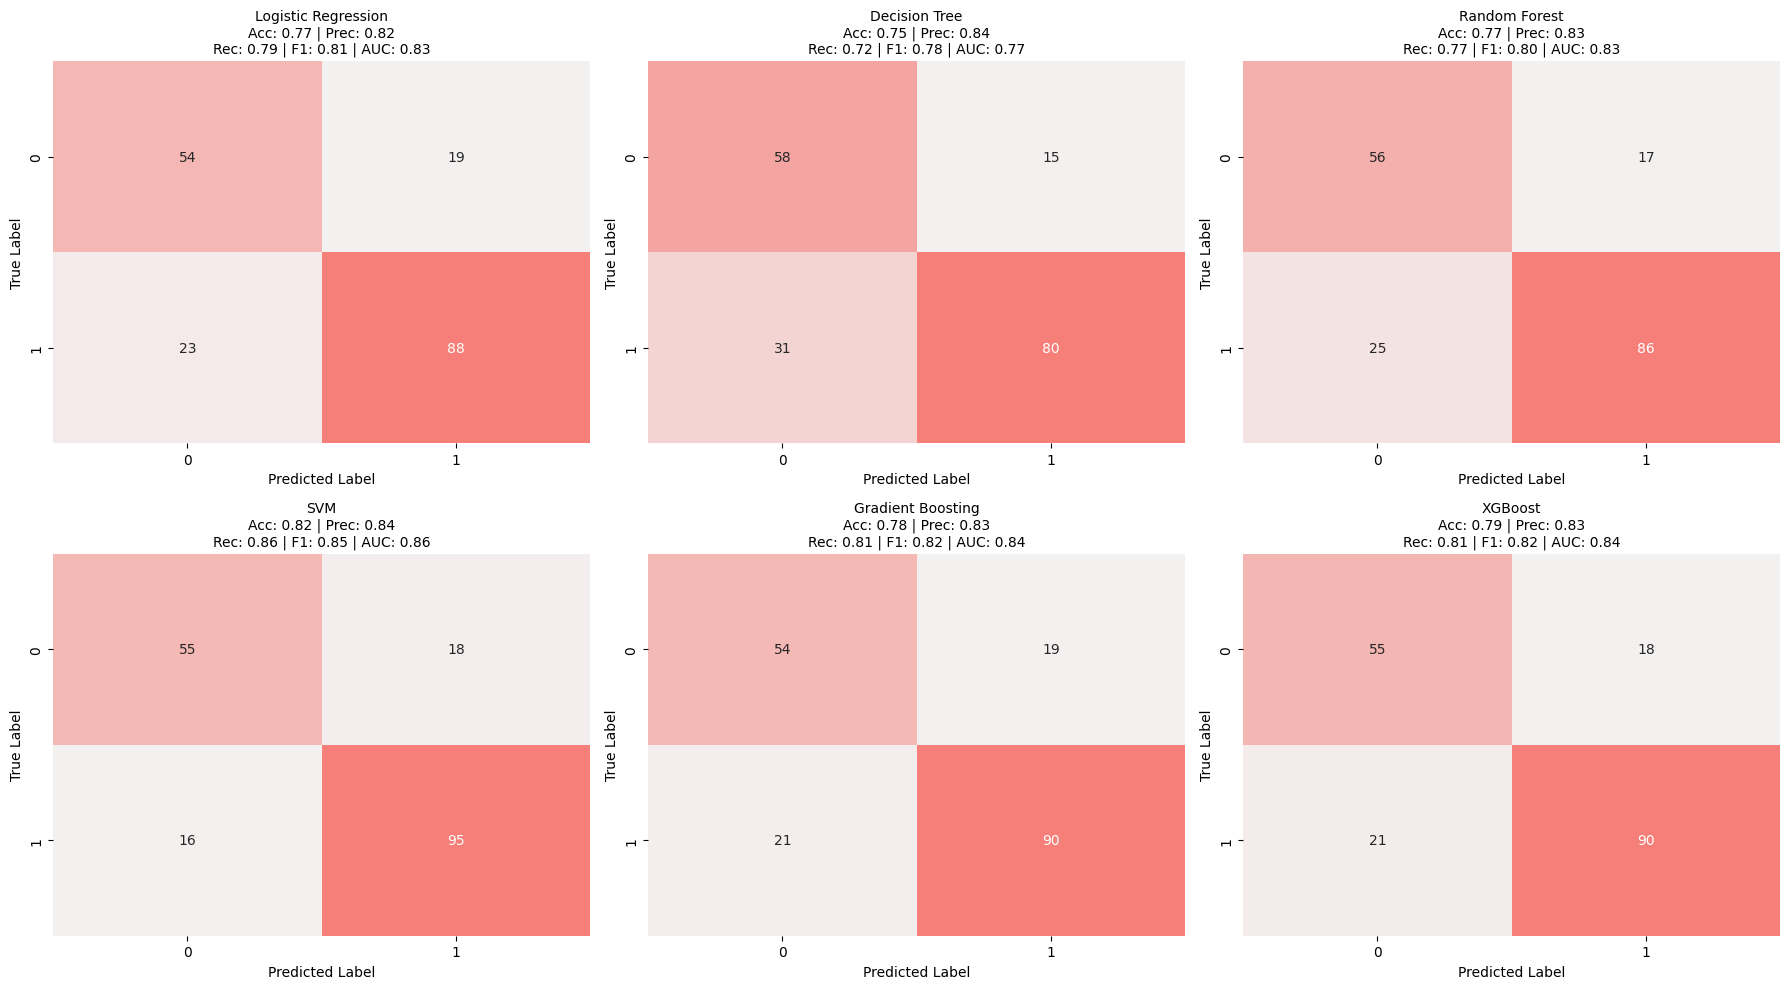

In [8]:

n_models = len(results)
n_cols = 3  # You can change this to control how many matrices per row
n_rows = math.ceil(n_models / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))
axes = axes.flatten()  # Flatten to easily iterate

# Custom pink colormap
custom_cmap = sns.light_palette("#f67f79", as_cmap=True)

# Plot each confusion matrix
for i, (name, data) in enumerate(results.items()):
    cm = data["confusion_matrix"]
    ax = axes[i]

    sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap, cbar=False, ax=ax)
    ax.set_title(f"{name}\n"
                 f"Acc: {data['accuracy']:.2f} | Prec: {data['precision']:.2f}\n"
                 f"Rec: {data['recall']:.2f} | F1: {data['f1_score']:.2f} | AUC: {data['auc_score']:.2f}",
                 fontsize=10)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
